<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total later 121

In [1]:
%pip install shap
%matplotlib inline
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz_later121.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,...,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_106to121,std_inz_later121,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,...,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,9.130560,76.867683,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,...,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,26.149586,85.137665,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,...,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,50.689297,67.368507,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,...,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,17.793818,28.406796,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,...,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,30.634008,22.887995,1.0


In [5]:
Y = df['std_inz_later121']
X = df.loc[:, ~df.columns.isin(['std_inz_later121', 'eastwest'])]

# RF model

In [6]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [7]:
rf.score(X, Y)

0.8619804469176338

# CatBoost Model

In [8]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(train_pool)
#print(preds)

Learning rate set to 0.033171
0:	learn: 46.2994061	total: 153ms	remaining: 2m 32s
1:	learn: 45.9642028	total: 159ms	remaining: 1m 19s
2:	learn: 45.6940598	total: 165ms	remaining: 55s
3:	learn: 45.4125930	total: 172ms	remaining: 42.7s
4:	learn: 45.0948692	total: 178ms	remaining: 35.4s
5:	learn: 44.9405582	total: 185ms	remaining: 30.7s
6:	learn: 44.6337440	total: 192ms	remaining: 27.3s
7:	learn: 44.4752761	total: 199ms	remaining: 24.7s
8:	learn: 44.3375095	total: 205ms	remaining: 22.6s
9:	learn: 44.1729003	total: 212ms	remaining: 21s
10:	learn: 43.9239025	total: 219ms	remaining: 19.7s
11:	learn: 43.7441473	total: 225ms	remaining: 18.6s
12:	learn: 43.4511222	total: 232ms	remaining: 17.6s
13:	learn: 43.3074815	total: 238ms	remaining: 16.8s
14:	learn: 43.1620562	total: 245ms	remaining: 16.1s
15:	learn: 42.9498806	total: 251ms	remaining: 15.5s
16:	learn: 42.8443192	total: 258ms	remaining: 14.9s
17:	learn: 42.7423823	total: 264ms	remaining: 14.4s
18:	learn: 42.4476254	total: 271ms	remaining: 

167:	learn: 24.8954307	total: 1.26s	remaining: 6.26s
168:	learn: 24.8595056	total: 1.27s	remaining: 6.24s
169:	learn: 24.8006928	total: 1.27s	remaining: 6.23s
170:	learn: 24.7215310	total: 1.28s	remaining: 6.21s
171:	learn: 24.5980224	total: 1.29s	remaining: 6.2s
172:	learn: 24.5290287	total: 1.29s	remaining: 6.19s
173:	learn: 24.4085336	total: 1.3s	remaining: 6.18s
174:	learn: 24.3212975	total: 1.31s	remaining: 6.17s
175:	learn: 24.2017769	total: 1.31s	remaining: 6.15s
176:	learn: 24.1351353	total: 1.32s	remaining: 6.14s
177:	learn: 24.1182120	total: 1.33s	remaining: 6.13s
178:	learn: 24.0426901	total: 1.33s	remaining: 6.12s
179:	learn: 23.9878115	total: 1.34s	remaining: 6.11s
180:	learn: 23.8866449	total: 1.35s	remaining: 6.09s
181:	learn: 23.8516103	total: 1.35s	remaining: 6.08s
182:	learn: 23.7343229	total: 1.36s	remaining: 6.07s
183:	learn: 23.7000641	total: 1.36s	remaining: 6.06s
184:	learn: 23.6162808	total: 1.37s	remaining: 6.05s
185:	learn: 23.5334176	total: 1.38s	remaining: 6

328:	learn: 14.1761594	total: 2.33s	remaining: 4.76s
329:	learn: 14.1235203	total: 2.34s	remaining: 4.75s
330:	learn: 14.1092031	total: 2.35s	remaining: 4.74s
331:	learn: 14.0335901	total: 2.35s	remaining: 4.73s
332:	learn: 14.0197753	total: 2.36s	remaining: 4.73s
333:	learn: 14.0090240	total: 2.37s	remaining: 4.72s
334:	learn: 13.9225397	total: 2.37s	remaining: 4.71s
335:	learn: 13.8493407	total: 2.38s	remaining: 4.7s
336:	learn: 13.7876992	total: 2.38s	remaining: 4.69s
337:	learn: 13.7235682	total: 2.39s	remaining: 4.68s
338:	learn: 13.6532768	total: 2.4s	remaining: 4.67s
339:	learn: 13.6114310	total: 2.4s	remaining: 4.67s
340:	learn: 13.5934775	total: 2.41s	remaining: 4.66s
341:	learn: 13.5156932	total: 2.42s	remaining: 4.65s
342:	learn: 13.4658129	total: 2.42s	remaining: 4.64s
343:	learn: 13.3960059	total: 2.43s	remaining: 4.63s
344:	learn: 13.3417352	total: 2.43s	remaining: 4.62s
345:	learn: 13.2804652	total: 2.44s	remaining: 4.61s
346:	learn: 13.1864806	total: 2.45s	remaining: 4.

495:	learn: 7.7988849	total: 3.41s	remaining: 3.46s
496:	learn: 7.7687565	total: 3.42s	remaining: 3.46s
497:	learn: 7.7616370	total: 3.42s	remaining: 3.45s
498:	learn: 7.7258185	total: 3.43s	remaining: 3.44s
499:	learn: 7.7021175	total: 3.44s	remaining: 3.44s
500:	learn: 7.6918981	total: 3.44s	remaining: 3.43s
501:	learn: 7.6852212	total: 3.45s	remaining: 3.42s
502:	learn: 7.6531512	total: 3.46s	remaining: 3.41s
503:	learn: 7.6099957	total: 3.46s	remaining: 3.41s
504:	learn: 7.5771554	total: 3.47s	remaining: 3.4s
505:	learn: 7.5459141	total: 3.47s	remaining: 3.39s
506:	learn: 7.5338608	total: 3.48s	remaining: 3.38s
507:	learn: 7.5074537	total: 3.49s	remaining: 3.38s
508:	learn: 7.4716916	total: 3.49s	remaining: 3.37s
509:	learn: 7.4680333	total: 3.5s	remaining: 3.36s
510:	learn: 7.4358922	total: 3.51s	remaining: 3.35s
511:	learn: 7.3853546	total: 3.51s	remaining: 3.35s
512:	learn: 7.3796188	total: 3.52s	remaining: 3.34s
513:	learn: 7.3431597	total: 3.52s	remaining: 3.33s
514:	learn: 7.

662:	learn: 4.5435722	total: 4.48s	remaining: 2.28s
663:	learn: 4.5367243	total: 4.49s	remaining: 2.27s
664:	learn: 4.5158965	total: 4.49s	remaining: 2.26s
665:	learn: 4.4929752	total: 4.5s	remaining: 2.26s
666:	learn: 4.4753951	total: 4.51s	remaining: 2.25s
667:	learn: 4.4607921	total: 4.51s	remaining: 2.24s
668:	learn: 4.4443191	total: 4.52s	remaining: 2.24s
669:	learn: 4.4310781	total: 4.53s	remaining: 2.23s
670:	learn: 4.4174974	total: 4.53s	remaining: 2.22s
671:	learn: 4.4105927	total: 4.54s	remaining: 2.21s
672:	learn: 4.3893404	total: 4.54s	remaining: 2.21s
673:	learn: 4.3678753	total: 4.55s	remaining: 2.2s
674:	learn: 4.3592859	total: 4.56s	remaining: 2.19s
675:	learn: 4.3482542	total: 4.56s	remaining: 2.19s
676:	learn: 4.3368427	total: 4.57s	remaining: 2.18s
677:	learn: 4.3250481	total: 4.58s	remaining: 2.17s
678:	learn: 4.2978416	total: 4.58s	remaining: 2.17s
679:	learn: 4.2875759	total: 4.59s	remaining: 2.16s
680:	learn: 4.2685453	total: 4.6s	remaining: 2.15s
681:	learn: 4.2

829:	learn: 2.6524442	total: 5.55s	remaining: 1.14s
830:	learn: 2.6424998	total: 5.56s	remaining: 1.13s
831:	learn: 2.6381157	total: 5.57s	remaining: 1.12s
832:	learn: 2.6293799	total: 5.57s	remaining: 1.12s
833:	learn: 2.6216669	total: 5.58s	remaining: 1.11s
834:	learn: 2.6120651	total: 5.59s	remaining: 1.1s
835:	learn: 2.6032075	total: 5.59s	remaining: 1.1s
836:	learn: 2.5969369	total: 5.6s	remaining: 1.09s
837:	learn: 2.5876233	total: 5.61s	remaining: 1.08s
838:	learn: 2.5775823	total: 5.61s	remaining: 1.08s
839:	learn: 2.5649262	total: 5.62s	remaining: 1.07s
840:	learn: 2.5561239	total: 5.63s	remaining: 1.06s
841:	learn: 2.5519323	total: 5.63s	remaining: 1.06s
842:	learn: 2.5437408	total: 5.64s	remaining: 1.05s
843:	learn: 2.5412010	total: 5.64s	remaining: 1.04s
844:	learn: 2.5301842	total: 5.65s	remaining: 1.04s
845:	learn: 2.5207049	total: 5.66s	remaining: 1.03s
846:	learn: 2.5164644	total: 5.66s	remaining: 1.02s
847:	learn: 2.5043757	total: 5.67s	remaining: 1.02s
848:	learn: 2.5

996:	learn: 1.5292420	total: 6.63s	remaining: 20ms
997:	learn: 1.5217733	total: 6.64s	remaining: 13.3ms
998:	learn: 1.5151419	total: 6.64s	remaining: 6.65ms
999:	learn: 1.5070498	total: 6.65s	remaining: 0us


# R2 CatBoost

In [9]:
cb.score(X, Y)

0.9989474320278661

# SHAP values 

# RF

In [10]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

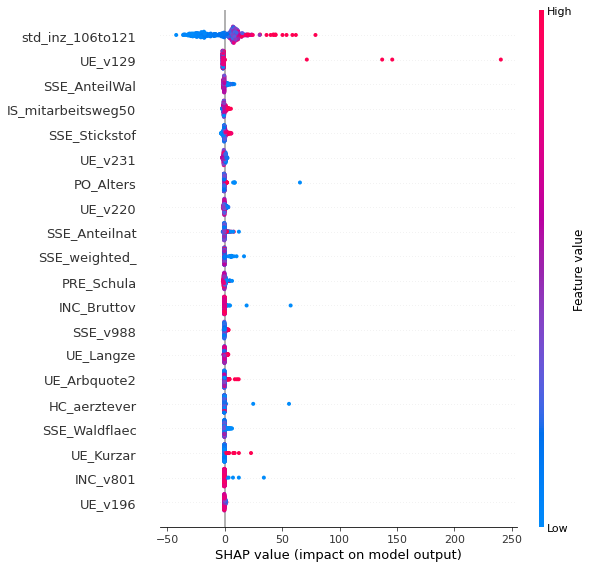

In [11]:
shap.summary_plot(shap_values, X,max_display=20) 

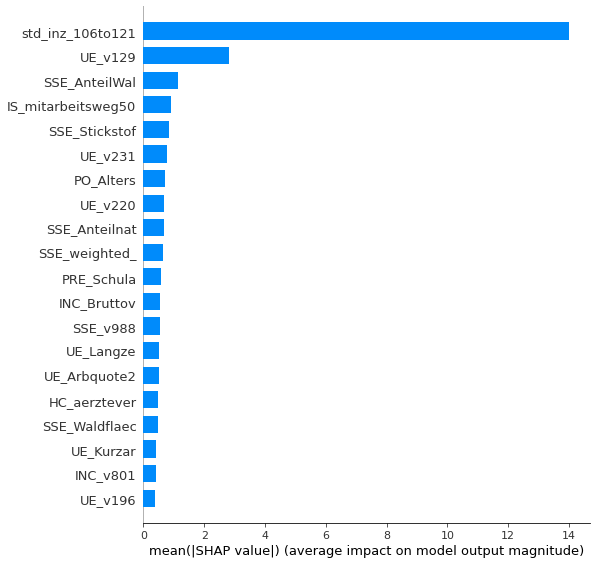

In [12]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

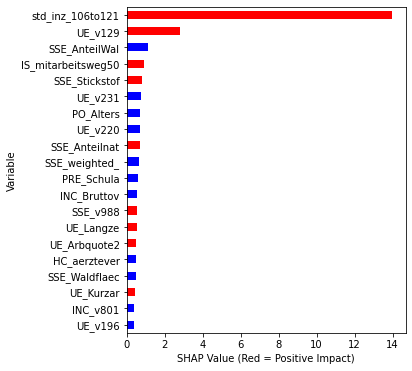

In [13]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [14]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

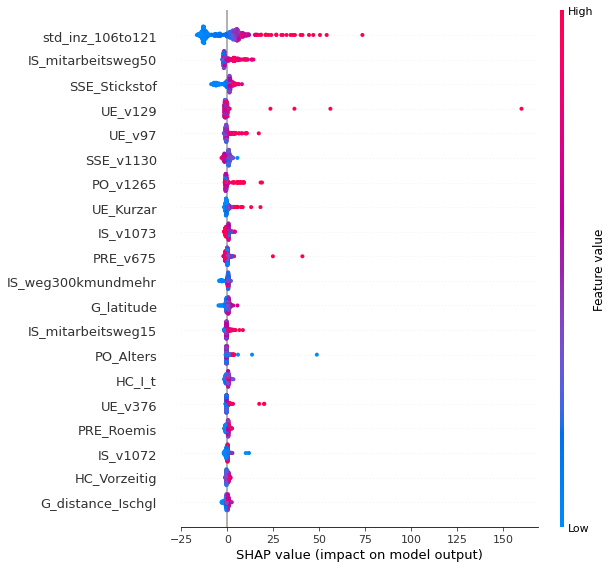

In [15]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

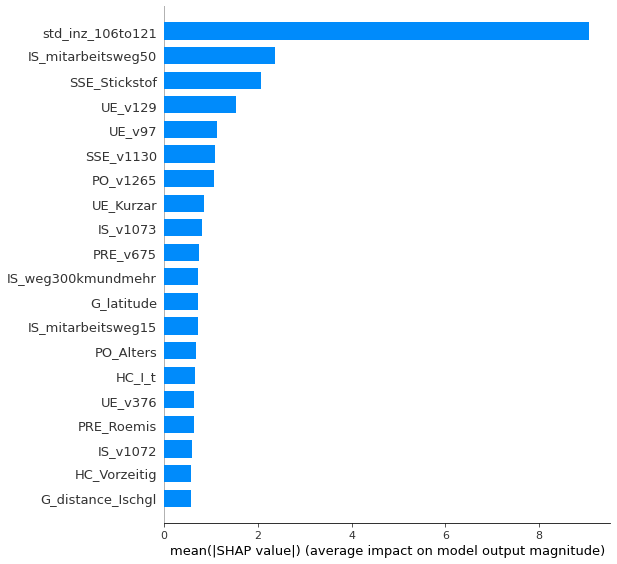

In [16]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


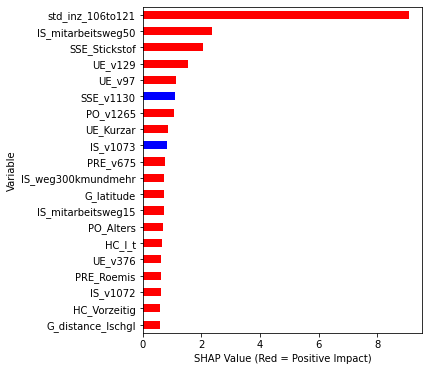

In [17]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 